In [14]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

В следущем блоке мы построим эмпирическое распределение плотности на основании выборки из 1000 элементов (синяя гистограмма). Она должна приближать теоретическую плотность (отмечена красным). По графику можно судить, насколько это приближение хорошо.

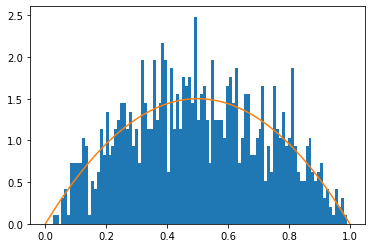

In [8]:
a = 2
b = 2
beta_rv = st.beta(a=a,b=b)
x = beta_rv.rvs(size = 1000)
plt.hist(x, bins = 100, density = True)
x = np.linspace(0,1,100)
cdf = beta_rv.pdf(x)
plt.plot(x, cdf)

Для начала построим гистограмму по выборочным средним по выборкам размера 5. Сгенерируем 1000 таких выборок. Известно, что распределение выборочных средних должно хорошо приближаться нормальным с мат. ожиданием E(X_1) и дисперсией D(X_1)/n, где n - размер выборки (в нашем случае 5), а X_1 - наша случайная величина, имеющая бета-распределение с параметрами a = 2 и b = 2. Мат ожидание бета-распределения с такими параметрами равно 1/2, а дисперсия равна 1/20 (можно найти общую формулу для мат. ожидания и диспресии бета-распределения на википедии и подставить туда наши значения a и b). Ниже приведена гистограмма с наложенной поверх нее плотностью соответствующего нормального распределения.

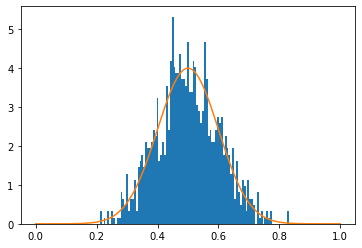

In [17]:
x_1 = np.array([])

for i in range(0,1000):
    tmp_rv = beta_rv.rvs(size = 5)
    tmp_rv_np = np.array(tmp_rv)
    x_1 = np.append(x_1, np.mean(tmp_rv_np))

plt.hist(x_1, bins = 100, density = True)
t_1 = np.linspace(0,1,100)
norm_1 = st.norm(loc = 1/2, scale = math.sqrt(1/(20*5)))
cdf_1 = norm_1.pdf(t_1)
plt.plot(t_1, cdf_1)

Ниже мы строим все то же самое, но выборочные средние теперь формируются на основании выборки из 10 элементов.

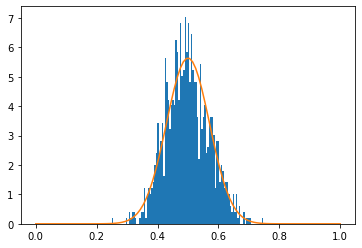

In [20]:
x_2 = np.array([])

for i in range(0,1000):
    tmp_rv = beta_rv.rvs(size = 10)
    tmp_rv_np = np.array(tmp_rv)
    x_2 = np.append(x_2, np.mean(tmp_rv_np))

plt.hist(x_2, bins = 100, density = True)
t_2 = np.linspace(0,1,100)
norm_2 = st.norm(loc = 1/2, scale = math.sqrt(1/(20*10)))
cdf_2 = norm_2.pdf(t_2)
plt.plot(t_2, cdf_2)

Ниже действуем аналогично, но используем выборку уже из 50 элементов.

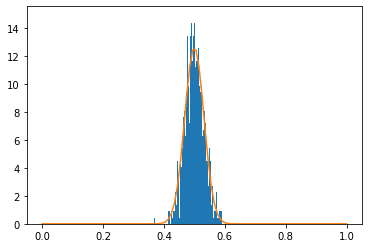

In [21]:
x_3 = np.array([])

for i in range(0,1000):
    tmp_rv = beta_rv.rvs(size = 50)
    tmp_rv_np = np.array(tmp_rv)
    x_3 = np.append(x_3, np.mean(tmp_rv_np))

plt.hist(x_3, bins = 100, density = True)
t_3 = np.linspace(0,1,100)
norm_3 = st.norm(loc = 1/2, scale = math.sqrt(1/(20*50)))
cdf_3 = norm_3.pdf(t_3)
plt.plot(t_3, cdf_3)

Можно сделать следующий вывод: с ростом n гистограмма все больше совпадает с плотностью соответсвующего нормального распределения, то есть все лучше им моделруется. Уже при n = 50 мы получаем вполне точное приближение.